EVALUACIÓN FINAL: ANÁLISIS DE DATOS DE ATLETAS OLÍMPICOS

El Comité Olímpico Internacional ha recopilado información sobre el desempeño de atletas en diversas disciplinas a lo largo de los últimos juegos olímpicos.
El objetivo es analizar patrones de
rendimiento, identificar factores clave que influyen en el éxito de los atletas y realizar predicciones sobre el desempeño futuro.
El equipo de análisis de datos necesita que explores, transformes y modeles los datos para extraer información relevante sobre la relación entre características de los atletas (edad, altura, peso,
entrenamientos semanales, país) y su desempeño en las competiciones.

Objetivo

Evaluar la capacidad del estudiante para aplicar análisis exploratorio de datos, estadística descriptiva, correlación, regresión lineal y visualización de datos mediante Python y las librerías Pandas, Seaborn, Matplotlib y Statsmodels, en el contexto del desempeño de atletas olímpicos en distintas disciplinas deportivas.

INSTRUCCIONES

1. Análisis Exploratorio de Datos (2 puntos)

• Carga el dataset en un DataFrame de Pandas.

• Muestra las primeras 5 filas y usa .info() para obtener información sobre los datos.

• Calcula estadísticas descriptivas con .describe().

• Genera un histograma del número de entrenamientos semanales.


2. Estadística Descriptiva (2 puntos)

• Determina el tipo de variable de cada columna.

• Calcula la media, mediana y moda de la cantidad de medallas obtenidas.

• Calcula la desviación estándar de la altura de los atletas.

• Identifica valores atípicos en la columna de peso utilizando un boxplot.


3. Análisis de Correlación (2 puntos)

• Calcula la correlación de Pearson entre entrenamientos semanales y medallas totales.

• Crea un gráfico de dispersión (scatterplot) entre peso y medallas totales con Seaborn.

• Explica si existe correlación entre estas variables.


4. Regresión Lineal (2 puntos)

• Implementa un modelo de regresión lineal para predecir el número de medallas obtenidas en función del número de entrenamientos semanales.

• Obtén los coeficientes de regresión e interpreta el resultado.

• Calcula el R² para medir el ajuste del modelo.

• Usa Seaborn (regplot) para graficar la regresión lineal.


5. Visualización de Datos con Seaborn y Matplotlib (2 puntos)

• Crea un heatmap de correlación entre todas las variables numéricas.

• Crea un boxplot de la cantidad de medallas por disciplina deportiva.

• Personaliza los gráficos con títulos, etiquetas y colores

# **Importa Librerias**

In [2]:
import pandas as pd
import csv
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# **Carga Dataset**

In [3]:
files.upload()
archivo_csv = 'olimpicos.csv'

#leer archivo .csv
with open(archivo_csv, 'r', encoding='utf-8') as f:
    sample = f.read(2048)
    dialect = csv.Sniffer().sniff(sample)

df_olimpicos = pd.read_csv(archivo_csv, sep=dialect.delimiter)


Saving olimpicos.csv to olimpicos.csv


In [4]:
#verifico nulos
print(df_olimpicos.head)
df_olimpicos.info()
df_olimpicos.isnull().sum()
df_olimpicos.describe()

<bound method NDFrame.head of               Atleta  Edad  Altura_cm  Peso_kg            Deporte  \
0         Usain Bolt    34        195       94          Atletismo   
1       Simone Biles    26        142       47           Gimnasia   
2     Michael Phelps    35        193       88           Natación   
3      Katie Ledecky    27        183       70           Natación   
4     Nadia Comaneci    45        160       50           Gimnasia   
5           Mo Farah    38        175       65          Atletismo   
6  Yelena Isinbayeva    40        174       65  Salto con pértiga   

   Entrenamientos_Semanales  Medallas_Totales         Pais  
0                         6                 8      Jamaica  
1                        10                 7       EE.UU.  
2                         9                23       EE.UU.  
3                         8                10       EE.UU.  
4                         7                 5      Rumania  
5                         6                 4  Rein

,Edad,Altura_cm,Peso_kg,Entrenamientos_Semanales,Medallas_Totales
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,35.000000,174.571429,68.428571,7.285714,8.571429
std,6.831301,18.715921,17.614929,1.799471,6.803361
min,26.000000,142.000000,47.000000,5.000000,3.000000
25%,30.500000,167.000000,57.500000,6.000000,4.500000
50%,35.000000,175.000000,65.000000,7.000000,7.000000
75%,39.000000,188.000000,79.000000,8.500000,9.000000
max,45.000000,195.000000,94.000000,10.000000,23.000000


# **Histograma Entrenamientos semanales**

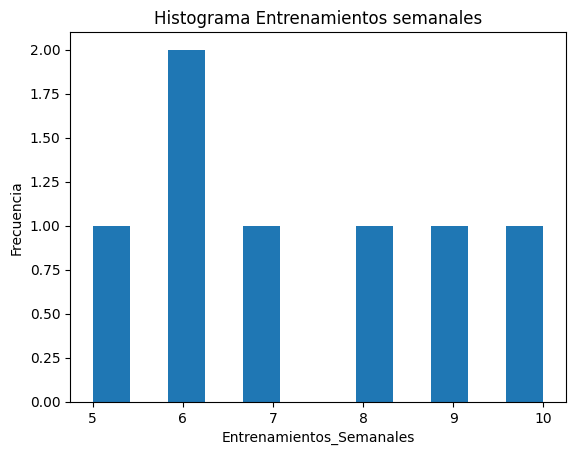

In [5]:
#histograma numero entrenamientos semanales
plt.hist(df_olimpicos['Entrenamientos_Semanales'], bins=12)
plt.xlabel('Entrenamientos_Semanales')
plt.ylabel('Frecuencia')
plt.title('Histograma Entrenamientos semanales')
plt.show()

# **Tipos de Variables**

Column                            Tipo
------------------------------------------------
 Atleta:                    Categórica

 Edad:                      Cuantitativa

 Altura_cm:                 Cuantitativa

 Peso_kg:                   Cuantitativa

 Deporte:                   Categórica

 Entrenamientos_Semanales:  Cuantitativa

 Medallas_Totales:          Cuantitativa

 Pais:                      Categórica

Media de Medallas_Totales: 8.571428571428571
Mediana de Medallas_Totales: 7.0
Moda de Medallas_Totales:
 0     3
1     4
2     5
3     7
4     8
5    10
6    23
Name: Medallas_Totales, dtype: int64
Desviación estándar de Altura_cm: 18.7159




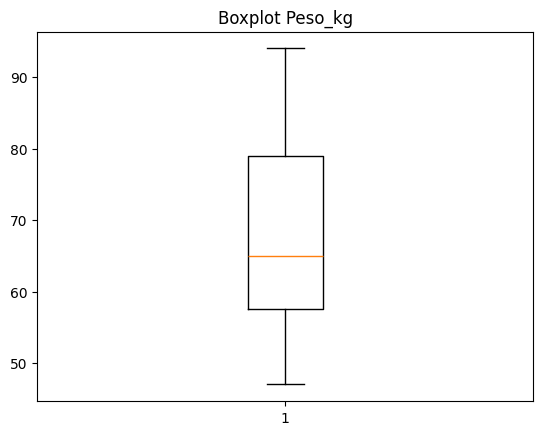

In [6]:
# media, mediana, moda  Medallas_Totales
media_medallas = df_olimpicos['Medallas_Totales'].mean()
mediana_medallas = df_olimpicos['Medallas_Totales'].median()
moda_medallas = df_olimpicos['Medallas_Totales'].mode()
#desv_st Altura
desviacion_estandar_altura = df_olimpicos['Altura_cm'].std()

print("Media de Medallas_Totales:",media_medallas)
print("Mediana de Medallas_Totales:",mediana_medallas)
print("Moda de Medallas_Totales:\n",moda_medallas)
print(f"Desviación estándar de Altura_cm:{desviacion_estandar_altura: .4f}")
print("\n")


#• Identifica valores atípicos en la columna de peso_kg utilizando un boxplot.
plt.boxplot(df_olimpicos['Peso_kg'])
plt.title('Boxplot Peso_kg')
plt.show()

Podemos ver que la media se encuentra mas cerca de Q1, por lo tanto tenemos una asimetría positiva para esta variable. Es decir, los datos se encuentran mayormente concentrados en los valores bajos.
Los bigotes son largos y desiguales, lo que reafirma la asimetría y además nos indica que hay una fuerte dispersion de los valores altos.

No hay outliers visibles.

**Conclusion:**  Muchos datos concentrados bajo la media y pocos valores sobre ella pero que alcanzan valores muy altos.



Resultados del análisis:
Correlación Pearson: 0.57
P-valor: 0.1817
No hay relación estadísticamente  significativa.




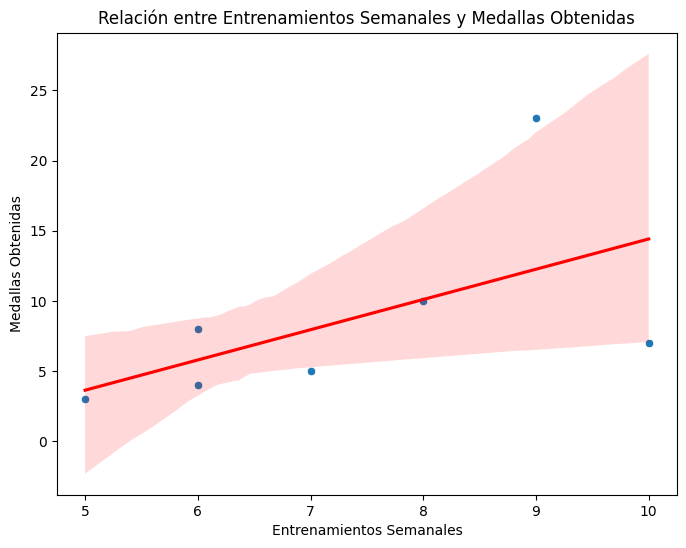

In [7]:
#Calcula la correlación de Pearson entre entrenamientos semanales y medallas totales.
correlacion, p_valor = pearsonr(df_olimpicos['Entrenamientos_Semanales'], df_olimpicos['Medallas_Totales'])

print("\nResultados del análisis:")
print(f"Correlación Pearson: {correlacion:.2f}")  # .2f = mostrar 2 decimales
print(f"P-valor: {p_valor:.4f}")  # .4f = mostrar 4 decimales

# Interpretamos el p-valor:
# - Si p_valor < 0.05 → hay relación significativa
# - Si p_valor ≥ 0.05 → no hay relación clara
if p_valor < 0.05:
    print("Hay una relación estadísticamente significativa.")
else:
    print("No hay relación estadísticamente  significativa.")

print("\n")

# Crea un gráfico de dispersión (scatterplot) entre peso y medallas totales con Seaborn.


# ================== VISUALIZACIÓN GRÁFICA ==================
plt.figure(figsize=(8, 6))  # Ancho=8, Alto=6 pulgadas
sns.scatterplot(x='Entrenamientos_Semanales', y='Medallas_Totales', data=df_olimpicos)
sns.regplot(x='Entrenamientos_Semanales', y='Medallas_Totales', data=df_olimpicos,
            scatter=False, color='red')  # Color rojo para destacar

# Añadimos títulos y etiquetas
plt.title('Relación entre Entrenamientos Semanales y Medallas Obtenidas')
plt.xlabel('Entrenamientos Semanales')
plt.ylabel('Medallas Obtenidas')
plt.show()

# Explica si existe correlación entre estas variables.

El valor de la Correlación de Pearson: 0.57 indica que hay una correlacion positiva moderada. Esto se observa claramente tambien en el gráfico de dispersión. Aún así, el P-valor de 0.1817 (< 0.05) indica que la correlacion no es estadísticamente confiable y que puede deberse al azar (o a que la muestra, como es claro en este caso, es muy pequeña).

Intercepto: -7.1250
Pendiente:  2.1544

Coeficiente de Determinación (R^2):  0.3247




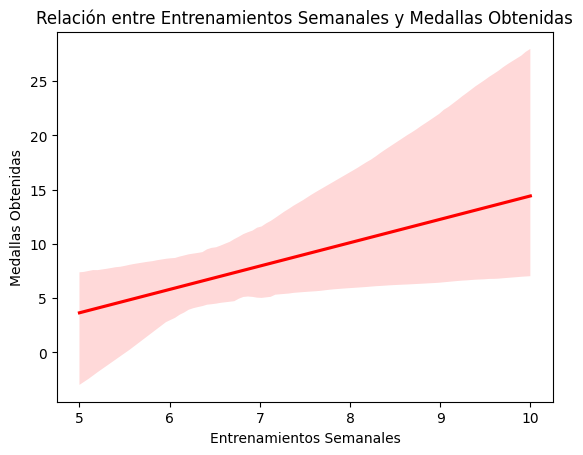

In [8]:
#Modelo de regresión lineal medallas obtenidas - entrenamientos semanales.
# Suponiendo que tienes un DataFrame llamado df_olimpicos
# Por ejemplo, predecir Medallas_Totales en función de Participantes

X = df_olimpicos[['Entrenamientos_Semanales']]  # Variable independiente (debe estar en formato de DataFrame)
y = df_olimpicos['Medallas_Totales']  # Variable dependiente

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)


# Mostrar coeficientes
print(f"Intercepto: {modelo.intercept_: .4f}")
print(f"Pendiente: {modelo.coef_[0]: .4f}")


# Hacer predicciones
df_olimpicos['Predicciones'] = modelo.predict(X)

#Coeficiente R2
r_cuadrado = r2_score(y, df_olimpicos['Predicciones'])
print(f"\nCoeficiente de Determinación (R^2): {r_cuadrado: .4f}")
print("\n")

# Graficar con regplot
sns.regplot(x='Entrenamientos_Semanales', y='Medallas_Totales', data=df_olimpicos, scatter=False, color='red')
plt.title('Relación entre Entrenamientos Semanales y Medallas Obtenidas')
plt.xlabel('Entrenamientos Semanales')
plt.ylabel('Medallas Obtenidas')
plt.show()


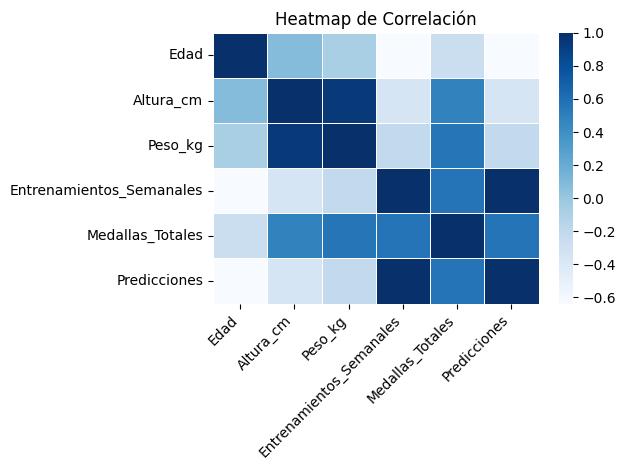

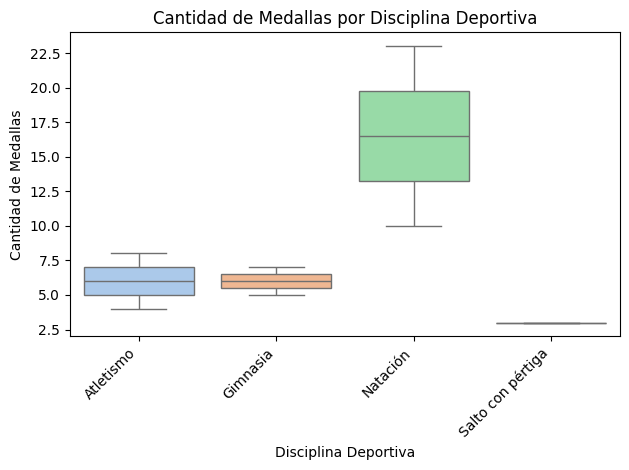

In [12]:
#heatmap de correlación entre todas las variables numéricas

df_num = df_olimpicos.select_dtypes(include=[np.number])

sns.heatmap(df_num.corr(),cmap='Blues', linewidths=0.5, fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Heatmap de Correlación')
plt.tight_layout()
plt.show()

print("\n\n\n")
#Crea un boxplot de la cantidad de medallas por disciplina deportiva.
sns.boxplot(x='Deporte', y='Medallas_Totales', data=df_olimpicos, palette='pastel', hue='Deporte', legend=False)
plt.title('Cantidad de Medallas por Disciplina Deportiva')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.xlabel('Disciplina Deportiva')
plt.ylabel('Cantidad de Medallas')

plt.show()


#Personaliza los gráficos con títulos, etiquetas y colores